In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pywt import wavedec

## Preprocessing

In [54]:
csv_uri = '../Preprocessing/db5/data_MfccDwtRmsCqtdb5L7.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_NEW/MVP/New_MVP_062.wav,92.870842,24.357082,-27.629684,24.433372,-13.491373,2.708617,-4.398451,5.272415,-8.067860,...,0.137365,0.348570,0.771088,0.939721,0.993090,1.178565,1.116576,0.727374,0.302255,MVP
1,../data/DWT_NEW/MVP/New_MVP_109.wav,78.814095,23.990421,-26.376701,18.173103,-9.201612,6.989347,0.648076,-2.389598,3.136159,...,0.978588,0.771511,0.383151,0.239212,0.225346,0.121861,0.610725,0.866391,0.822465,MVP
2,../data/DWT_NEW/MVP/New_MVP_009.wav,88.377533,16.612139,-23.564346,15.967838,-15.792244,7.712596,-4.227619,4.524390,-2.968157,...,0.140006,0.421694,0.615760,0.706717,0.829085,1.049231,0.937493,0.628620,0.410632,MVP
3,../data/DWT_NEW/MVP/New_MVP_177.wav,54.980991,32.514500,-20.546692,-3.920696,-1.999262,-1.016878,5.398015,-5.580258,-5.280154,...,0.317703,0.550761,0.561609,0.371856,0.126596,0.134080,0.148641,0.048142,0.143577,MVP
4,../data/DWT_NEW/MVP/New_MVP_069.wav,104.237396,19.615040,-19.519978,16.122334,-12.459391,1.737201,-2.739453,5.714132,-4.384241,...,0.094351,0.388049,0.794470,0.917151,0.989071,1.250716,1.148000,0.732668,0.380703,MVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,../data/DWT_NEW/AS/New_AS_171.wav,-26.105711,-15.449812,-36.978638,-1.034063,-20.812317,3.340528,0.518283,3.126730,6.568941,...,0.155892,0.225370,0.223179,0.188572,0.188586,0.210036,0.224767,0.244684,0.255359,AS
896,../data/DWT_NEW/AS/New_AS_067.wav,128.304199,61.931343,-18.051363,2.008468,3.906512,-0.554804,1.494866,3.620166,2.406869,...,1.713595,2.064872,1.547283,1.539802,1.859200,1.585504,1.576957,1.594643,1.545362,AS
897,../data/DWT_NEW/AS/New_AS_174.wav,95.823776,1.689007,-22.700516,13.097798,-8.183233,1.008855,1.829977,2.620759,-0.929685,...,0.697913,0.571795,0.531671,0.471085,0.303654,0.216042,0.393796,0.636985,0.785355,AS
898,../data/DWT_NEW/AS/New_AS_189.wav,87.373177,8.180610,-11.838139,12.646927,11.164171,5.264530,-4.486119,6.821229,-12.294690,...,0.128408,0.176729,0.216528,0.237778,0.531533,0.668927,0.686746,0.855733,0.873761,AS


In [55]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [56]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,92.870842,24.357082,-27.629684,24.433372,-13.491373,2.708617,-4.398451,5.272415,-8.067860,-6.561420,...,0.353931,0.137365,0.348570,0.771088,0.939721,0.993090,1.178565,1.116576,0.727374,0.302255
1,78.814095,23.990421,-26.376701,18.173103,-9.201612,6.989347,0.648076,-2.389598,3.136159,-1.710252,...,0.820654,0.978588,0.771511,0.383151,0.239212,0.225346,0.121861,0.610725,0.866391,0.822465
2,88.377533,16.612139,-23.564346,15.967838,-15.792244,7.712596,-4.227619,4.524390,-2.968157,5.247740,...,0.254569,0.140006,0.421694,0.615760,0.706717,0.829085,1.049231,0.937493,0.628620,0.410632
3,54.980991,32.514500,-20.546692,-3.920696,-1.999262,-1.016878,5.398015,-5.580258,-5.280154,9.981142,...,0.132705,0.317703,0.550761,0.561609,0.371856,0.126596,0.134080,0.148641,0.048142,0.143577
4,104.237396,19.615040,-19.519978,16.122334,-12.459391,1.737201,-2.739453,5.714132,-4.384241,-2.834017,...,0.377803,0.094351,0.388049,0.794470,0.917151,0.989071,1.250716,1.148000,0.732668,0.380703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-26.105711,-15.449812,-36.978638,-1.034063,-20.812317,3.340528,0.518283,3.126730,6.568941,-3.379538,...,0.154837,0.155892,0.225370,0.223179,0.188572,0.188586,0.210036,0.224767,0.244684,0.255359
896,128.304199,61.931343,-18.051363,2.008468,3.906512,-0.554804,1.494866,3.620166,2.406869,-0.921402,...,0.968589,1.713595,2.064872,1.547283,1.539802,1.859200,1.585504,1.576957,1.594643,1.545362
897,95.823776,1.689007,-22.700516,13.097798,-8.183233,1.008855,1.829977,2.620759,-0.929685,-4.000449,...,0.646634,0.697913,0.571795,0.531671,0.471085,0.303654,0.216042,0.393796,0.636985,0.785355
898,87.373177,8.180610,-11.838139,12.646927,11.164171,5.264530,-4.486119,6.821229,-12.294690,-4.731411,...,0.207472,0.128408,0.176729,0.216528,0.237778,0.531533,0.668927,0.686746,0.855733,0.873761


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(180,)
(720, 101, 1)
(180, 101, 1)


In [59]:
X_train.shape[2], y.shape

(1, (900,))

In [60]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [61]:
# LSTM tensorflow
model = tf.keras.Sequential([
    # tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    # tf.keras.layers.Dense(32,activation='relu'),

    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),

    # tf.keras.layers.Dense(5, activation='softmax')
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),


    tf.keras.layers.Dense(5, activation='softmax')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
45/45 [==============================] - 4s 34ms/step - loss: 1.5636 - acc: 0.2625 - val_loss: 1.4976 - val_acc: 0.3333
Epoch 2/50
45/45 [==============================] - 1s 21ms/step - loss: 1.4276 - acc: 0.4333 - val_loss: 1.3307 - val_acc: 0.5278
Epoch 3/50
45/45 [==============================] - 1s 22ms/step - loss: 1.2462 - acc: 0.5569 - val_loss: 1.1742 - val_acc: 0.6111
Epoch 4/50
45/45 [==============================] - 1s 24ms/step - loss: 1.0696 - acc: 0.6611 - val_loss: 1.0548 - val_acc: 0.6833
Epoch 5/50
45/45 [==============================] - 1s 22ms/step - loss: 0.9272 - acc: 0.7333 - val_loss: 0.9442 - val_acc: 0.6944
Epoch 6/50
45/45 [==============================] - 1s 21ms/step - loss: 0.8141 - acc: 0.7736 - val_loss: 0.8658 - val_acc: 0.7056
Epoch 7/50
45/45 [==============================] - 1s 21ms/step - loss: 0.7272 - acc: 0.7903 - val_loss: 0.8152 - val_acc: 0.7444
Epoch 8/50
45/45 [==============================] - 1s 21ms/step - loss: 0.6606 - a

In [62]:
model.save('../modelh5/model_lstm_tuning.h5')

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


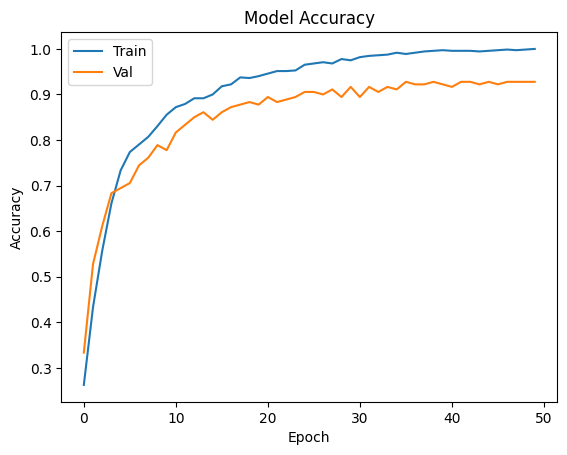

In [63]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [64]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

6/6 [==============================] - 0s 10ms/step - loss: 0.3948 - acc: 0.9278
Accuracy on test set is: 0.9277777671813965


In [65]:
X_test

array([[[-1.63003235e+02],
        [-1.75405045e+01],
        [ 5.38192558e+00],
        ...,
        [ 2.44172979e-02],
        [ 3.18813063e-02],
        [ 5.09516709e-02]],

       [[-5.39478350e+00],
        [ 2.98918362e+01],
        [ 9.25503552e-01],
        ...,
        [ 2.58339286e-01],
        [ 2.55945623e-01],
        [ 2.86839604e-01]],

       [[ 6.30938950e+01],
        [ 3.65834427e+01],
        [-9.22769547e+00],
        ...,
        [ 2.93014139e-01],
        [ 1.73747241e-01],
        [ 2.36895248e-01]],

       ...,

       [[ 6.89998932e+01],
        [ 7.85595131e+00],
        [-1.85865097e+01],
        ...,
        [ 4.34352726e-01],
        [ 2.35569119e-01],
        [ 2.80983388e-01]],

       [[ 1.03726051e+02],
        [ 2.47434769e+01],
        [-2.99513760e+01],
        ...,
        [ 1.16434526e+00],
        [ 7.73346484e-01],
        [ 6.58450484e-01]],

       [[ 1.01751320e+02],
        [ 2.01218395e+01],
        [-1.82530346e+01],
        ...,
        

In [66]:
model.predict(X_test)

6/6 [==============================] - 0s 8ms/step


array([[3.63062485e-03, 1.56480093e-02, 1.00246873e-02, 9.62811530e-01,
        7.88510591e-03],
       [1.00451207e-03, 9.77587283e-01, 4.07892279e-03, 1.18358424e-02,
        5.49338246e-03],
       [4.03646566e-02, 9.32336203e-04, 9.26920295e-01, 3.14450860e-02,
        3.37700883e-04],
       [3.92941423e-02, 2.76511282e-01, 7.54807740e-02, 4.58054870e-01,
        1.50658980e-01],
       [2.19783789e-04, 1.60163958e-02, 6.56982185e-04, 9.78432655e-01,
        4.67418646e-03],
       [9.94665146e-01, 2.12430488e-03, 2.09896825e-03, 8.87695584e-04,
        2.23906813e-04],
       [4.67525702e-03, 1.24613255e-01, 8.56775045e-01, 4.31323284e-03,
        9.62320622e-03],
       [5.54436920e-05, 1.49602082e-03, 6.42681043e-05, 9.94856417e-01,
        3.52772954e-03],
       [2.29573995e-01, 3.92143466e-02, 7.17416629e-02, 6.57147169e-01,
        2.32277834e-03],
       [2.40551215e-02, 1.91103555e-02, 1.55863655e-03, 9.52867687e-01,
        2.40821135e-03],
       [9.65953688e-04, 1.6224

In [67]:

# confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

6/6 [==============================] - 0s 11ms/step


array([[33,  2,  0,  0,  0],
       [ 0, 28,  1,  2,  0],
       [ 0,  2, 33,  3,  0],
       [ 1,  0,  0, 34,  0],
       [ 1,  1,  0,  0, 39]])

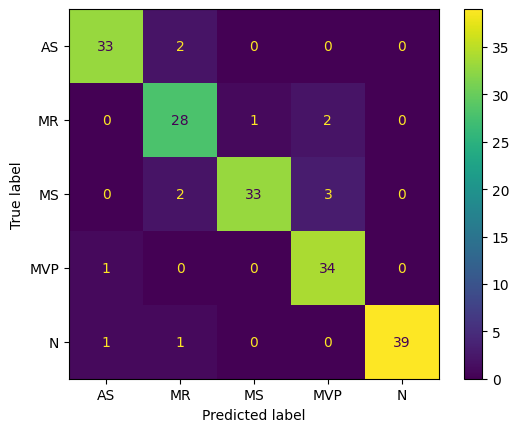

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [69]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [70]:
print(TNR)

[0.9862069  0.96644295 0.99295775 0.96551724 1.        ]


In [71]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.85      0.90      0.88        31
           2       0.97      0.87      0.92        38
           3       0.87      0.97      0.92        35
           4       1.00      0.95      0.97        41

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180



In [72]:
# save h5
model_uri = '../modelh5/model_lstm_tuning.h5'
model.save(model_uri)

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 101, 64)           16896     
                                                                 
 dense_8 (Dense)             (None, 101, 32)           2080      
                                                                 
 flatten_2 (Flatten)         (None, 3232)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                206912    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 228133 (891.14 KB)
Trainable params: 228

In [78]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db6', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD6, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD6)[0]
    cqt = np.abs(librosa.cqt(y=cD6, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_105.wav')

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=339
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=339
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=170
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=85
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=43
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input s

1/1 [==============================] - 0s 420ms/step
[2.2602426e-02 8.1322229e-01 1.5993628e-01 2.4091922e-04 3.9981902e-03]
1
Predicted class: MR


In [75]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,Signal,26.436314,-10.494244,35.811016,-15.222628,-15.726971,16.780603,-22.342094,15.816399,-7.947585,...,0.185491,0.18728,0.204257,0.168715,0.182605,0.158116,0.155143,0.13761,0.128972,NaN
